In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('/kaggle/input/zomato-restaurants-data/zomato.csv', encoding='latin-1')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [8]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

#  Observation-1
1. Object basically indicating string

In [11]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


# Observation-2
1. all the integer value will be shown here, not the text value like categorical values

# In data analysis what we basically do?
1. Missing values
1. Explore the numerical values
1. Explore the categorical values
1. Finding relationship between features


# 1.Starting to find missing values

In [4]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [9]:
[features for features in df.columns if df[features].isnull().sum()>0]

['Cuisines']

<Axes: >

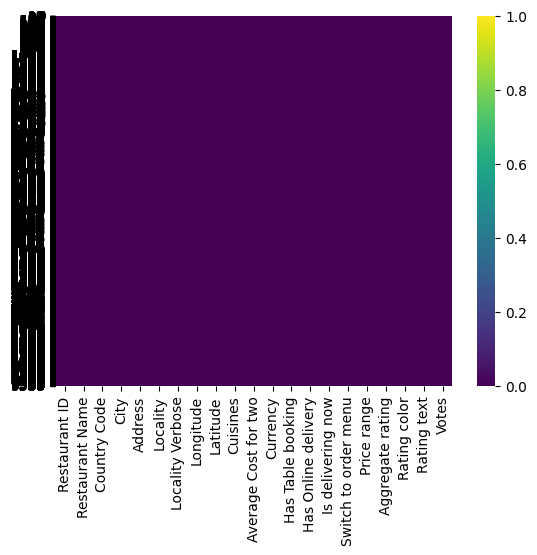

In [24]:
sns.heatmap(df.isnull(),xticklabels=True ,yticklabels=True, cmap='viridis', cbar=True)

<Axes: >

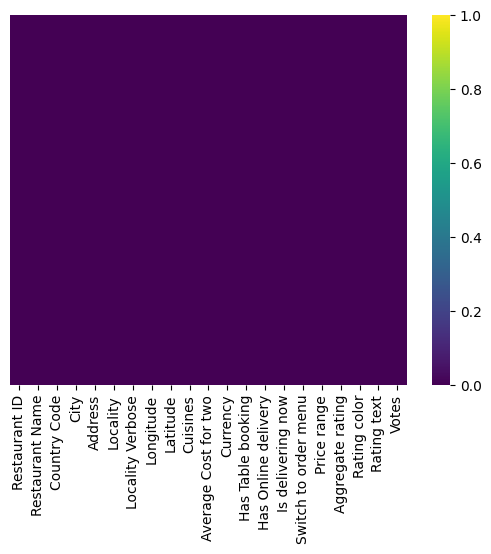

In [25]:
sns.heatmap(df.isnull(),xticklabels=True ,yticklabels=False, cmap='viridis', cbar=True)

In [3]:
df_country=pd.read_excel('/kaggle/input/zomato-restaurants-data/Country-Code.xlsx')
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


# Meging the 2 dataests

In [4]:
final_df=pd.merge(df,df_country,on='Country Code',how='left')
final_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [9]:
##To check datatypes
final_df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [11]:
final_df.Country.value_counts()

Country
India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: count, dtype: int64

In [5]:
country_names=final_df.Country.value_counts().index
country_names

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object', name='Country')

In [6]:
country_vals=final_df.Country.value_counts().values
country_vals

array([8652,  434,   80,   60,   60,   60,   40,   34,   24,   22,   21,
         20,   20,   20,    4])

([<matplotlib.patches.Wedge at 0x78fbbb1df730>,
 [Text(-1.052256163793291, 0.3205572737577906, 'India'),
  Text(0.9911329812843455, -0.477132490415823, 'United States'),
  Text(1.0572858296119743, -0.3035567072257165, 'United Kingdom'),
  Text(1.070138816916019, -0.2545641619112621, 'Brazil'),
  Text(1.0793506814479759, -0.21213699926648824, 'UAE'),
  Text(1.086881147244973, -0.16937937230799818, 'South Africa'),
  Text(1.0918635911832035, -0.1335436192729486, 'New Zealand'),
  Text(1.0947903814016446, -0.10692998078388304, 'Turkey'),
  Text(1.096631023945382, -0.08602556201794338, 'Australia'),
  Text(1.0978070729776455, -0.06942355882735218, 'Phillipines'),
  Text(1.0986791544015209, -0.05388984768543213, 'Indonesia'),
  Text(1.0993059848742366, -0.039068550263413035, 'Singapore'),
  Text(1.0997248508282123, -0.02460187941736628, 'Qatar'),
  Text(1.0999533462179636, -0.010130949802716446, 'Sri Lanka'),
  Text(1.0999990477553414, -0.0014473898376707638, 'Canada')])

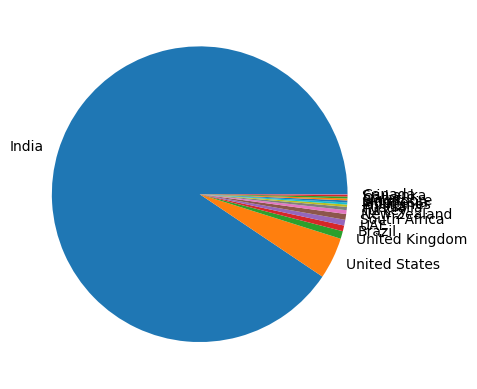

In [21]:
plt.pie(x=country_vals,labels=country_names)

([<matplotlib.patches.Wedge at 0x78fbb8046ef0>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.87%')])

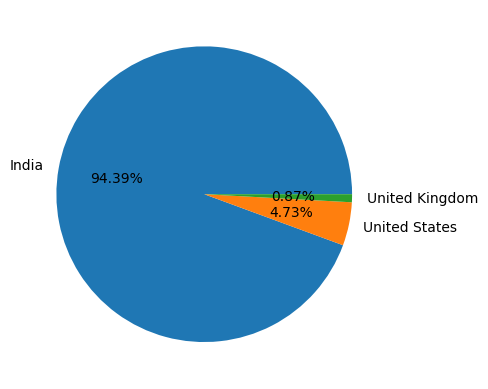

In [30]:
#finding top 3 countries where zomato are available
plt.pie(x=country_vals[:3],labels=country_names[:3],autopct='%1.2f%%')

# Observation-3
*Zomato does there maximum business in india and then united states and after than united kingdom*

In [31]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [8]:
final_df.groupby(['Aggregate rating','Rating color','Rating text']).size()

Aggregate rating  Rating color  Rating text
0.0               White         Not rated      2148
1.8               Red           Poor              1
1.9               Red           Poor              2
2.0               Red           Poor              7
2.1               Red           Poor             15
2.2               Red           Poor             27
2.3               Red           Poor             47
2.4               Red           Poor             87
2.5               Orange        Average         110
2.6               Orange        Average         191
2.7               Orange        Average         250
2.8               Orange        Average         315
2.9               Orange        Average         381
3.0               Orange        Average         468
3.1               Orange        Average         519
3.2               Orange        Average         522
3.3               Orange        Average         483
3.4               Orange        Average         498
3.5               Ye

In [9]:
ratings=final_df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Counts'})

In [10]:
ratings

,Aggregate rating,Rating color,Rating text,Rating Counts
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


# Observation-4
1. When rating is between 4.5 to 4.9 --> Excellent
1. When rating is between 4.0 to 4.4 -->Very good
1. When rating is between 3.5 to 3.9 -->Good
1. When rating is between 3.0 to 3.4 -->Average
1. When rating is between 2.5 to 2.9 -->Average
1. When rating is between 2.0 to 2.4 -->Poor

<Axes: xlabel='Aggregate rating', ylabel='Rating Counts'>

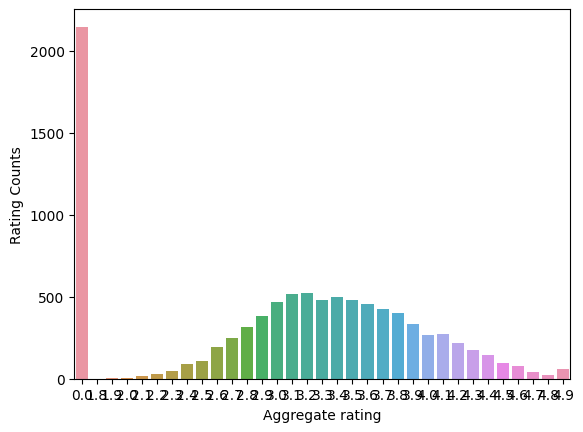

In [11]:
sns.barplot(x='Aggregate rating',y='Rating Counts',data=ratings)

<Axes: xlabel='Aggregate rating', ylabel='Rating Counts'>

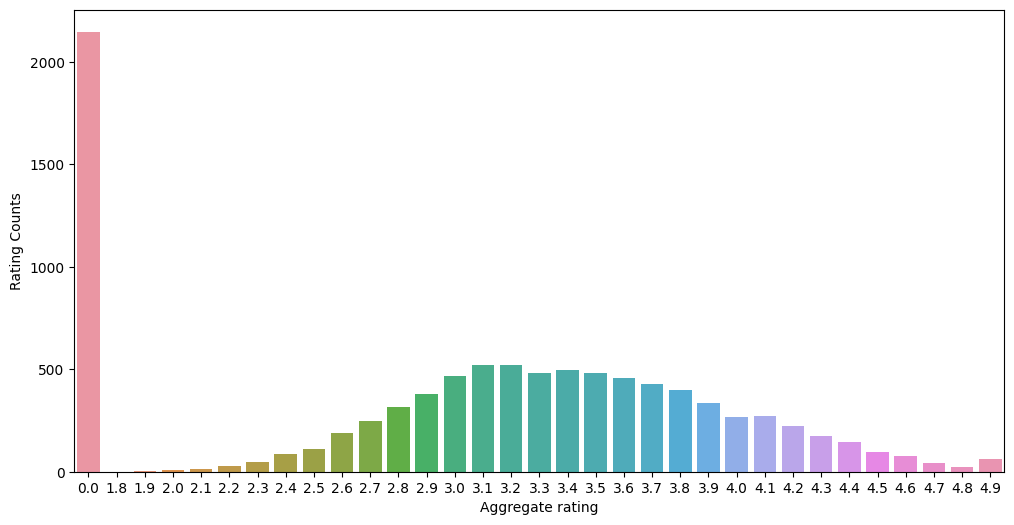

In [11]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(12,6)
sns.barplot(x='Aggregate rating',y='Rating Counts',data=ratings)

<Axes: xlabel='Aggregate rating', ylabel='Rating Counts'>

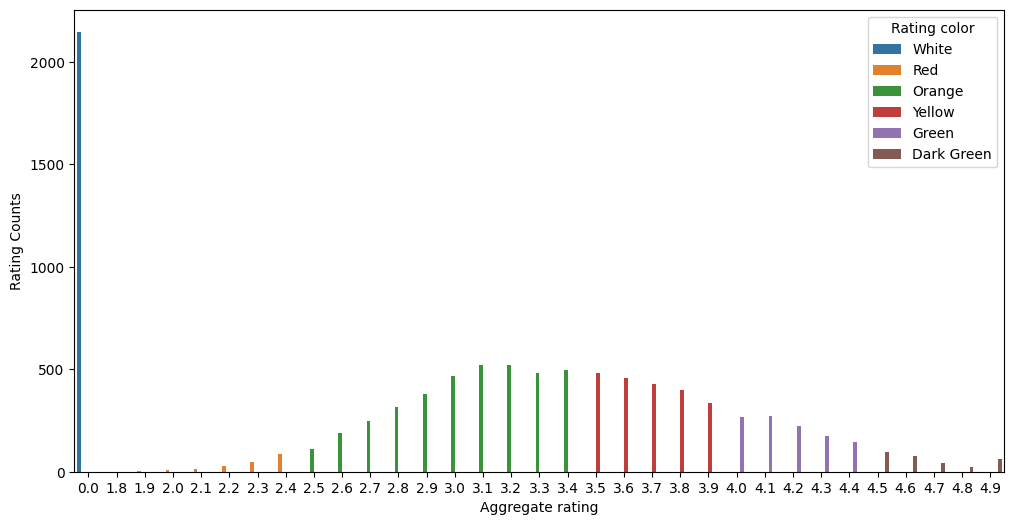

In [12]:
sns.barplot(x='Aggregate rating',y='Rating Counts',hue='Rating color',data=ratings)

<Axes: xlabel='Aggregate rating', ylabel='Rating Counts'>

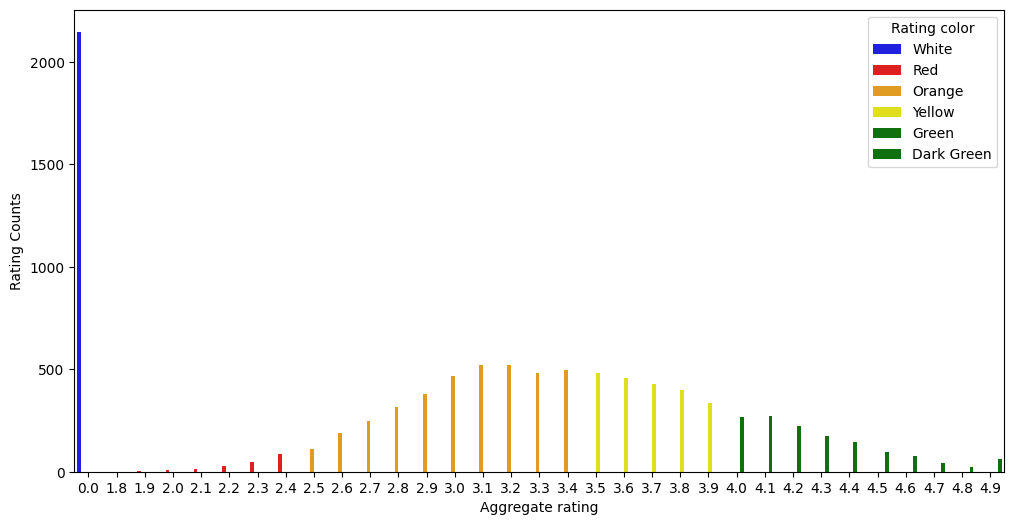

In [14]:
sns.barplot(x='Aggregate rating',y='Rating Counts',hue='Rating color',data=ratings,palette=['blue','red','orange','yellow','green','green'])

# Observation-5
1. Not rated count is very high
1. Maximum number of rating are between 2.5 to 3.4

<Axes: xlabel='Rating color', ylabel='count'>

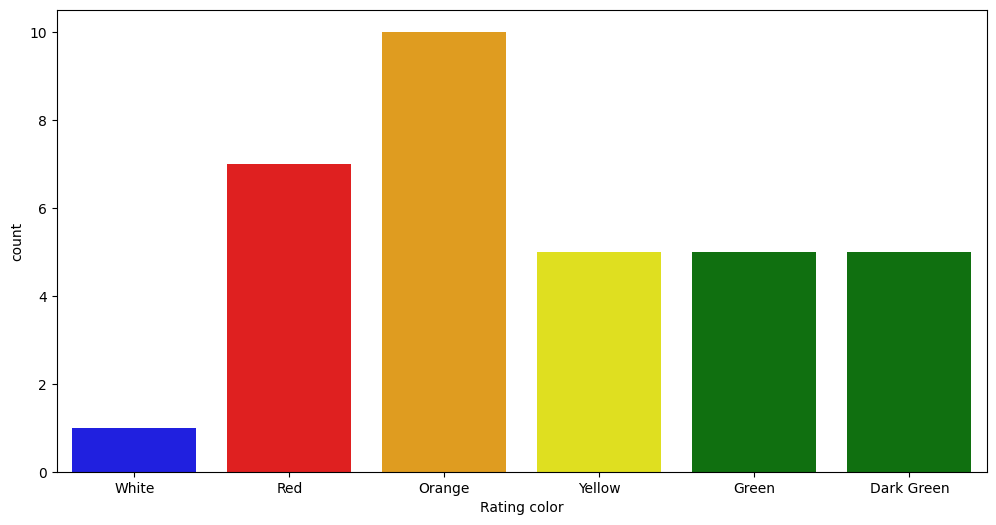

In [15]:
sns.countplot(x='Rating color',data=ratings,palette=['blue','red','orange','yellow','green','green'])

*This indicate the frequency not the white count number*

# Finding the coutries name that has given 0 rating

In [17]:
final_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [25]:
# Get the count of countries where 'Aggregate rating' is 0
country_ratings = final_df[final_df['Aggregate rating'] == 0]['Country'].value_counts()
print(country_ratings)



Country
India             2139
Brazil               5
United States        3
United Kingdom       1
Name: count, dtype: int64


In [27]:
country_ratings = final_df[final_df['Aggregate rating'] == 0]['Country'].value_counts()

# Print the unique country names and their respective counts
for country, count in country_ratings.items():
    print(f"{country}: {count}")

India: 2139
Brazil: 5
United States: 3
United Kingdom: 1


# Observation-6
*Maximum number of 0 rating are from india*

# Findin out, which currency is used by which country?

In [28]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [35]:
currency_finding=final_df.Country.unique()
print(currency_finding)

['Phillipines' 'Brazil' 'United States' 'Australia' 'Canada' 'Singapore'
 'UAE' 'India' 'Indonesia' 'New Zealand' 'United Kingdom' 'Qatar'
 'South Africa' 'Sri Lanka' 'Turkey']


In [42]:
# Group by 'Country' and get the unique currency used in each country
country_currency = final_df[['Country', 'Currency']].drop_duplicates()

# Print the country and its corresponding currency
for index, row in country_currency.iterrows():
    print(f"{row['Country']}: {row['Currency']}")


Phillipines: Botswana Pula(P)
Brazil: Brazilian Real(R$)
United States: Dollar($)
Australia: Dollar($)
Canada: Dollar($)
Singapore: Dollar($)
UAE: Emirati Diram(AED)
India: Indian Rupees(Rs.)
Indonesia: Indonesian Rupiah(IDR)
New Zealand: NewZealand($)
United Kingdom: Pounds(£)
Qatar: Qatari Rial(QR)
South Africa: Rand(R)
Sri Lanka: Sri Lankan Rupee(LKR)
Turkey: Turkish Lira(TL)


In [39]:
country_currency

,Country,Currency
0,Phillipines,Botswana Pula(P)
22,Brazil,Brazilian Real(R$)
82,United States,Dollar($)
102,Australia,Dollar($)
185,Canada,Dollar($)
456,Singapore,Dollar($)
564,UAE,Emirati Diram(AED)
624,India,Indian Rupees(Rs.)
9276,Indonesia,Indonesian Rupiah(IDR)
9297,New Zealand,NewZealand($)


# Finding out,Which country do have the online delivery?

In [48]:

final_df[final_df['Has Online delivery']=="Yes"]['Country'].value_counts()

Country
India    2423
UAE        28
Name: count, dtype: int64

# Observation-7
Online deliveries are available in India and UAE

# Create a pie chart for city distribution

In [54]:
final_df['City'].value_counts()

City
New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: count, Length: 141, dtype: int64

In [57]:
final_df['City'].value_counts().values

array([5473, 1118, 1080,  251,   25,   21,   21,   21,   21,   21,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         18,   18,   16,   14,   11,    6,    4,    4,    3,    3,    2,
          2,    2,    2,    2,    2,    2,    2,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1])

In [58]:
final_df['City'].value_counts().index

Index(['New Delhi', 'Gurgaon', 'Noida', 'Faridabad', 'Ghaziabad',
       'Bhubaneshwar', 'Amritsar', 'Ahmedabad', 'Lucknow', 'Guwahati',
       ...
       'Ojo Caliente', 'Montville', 'Monroe', 'Miller', 'Middleton Beach',
       'Panchkula', 'Mc Millan', 'Mayfield', 'Macedon', 'Vineland Station'],
      dtype='object', name='City', length=141)

([<matplotlib.patches.Wedge at 0x78319390acb0>,
 [Text(-0.6145352824185932, 0.9123301960708633, 'New Delhi'),
  Text(0.0623675251198054, -1.0982305276263407, 'Gurgaon'),
  Text(0.8789045225625368, -0.6614581167535246, 'Noida'),
  Text(1.0922218418223437, -0.13058119407559224, 'Faridabad'),
  Text(1.099946280005612, -0.010871113182029924, 'Ghaziabad')],
 [Text(-0.3352010631374145, 0.497634652402289, '68.87%'),
  Text(0.0340186500653484, -0.5990348332507311, '14.07%'),
  Text(0.47940246685229276, -0.36079533641101336, '13.59%'),
  Text(0.5957573682667329, -0.07122610585941394, '3.16%'),
  Text(0.5999706981848791, -0.005929698099289049, '0.31%')])

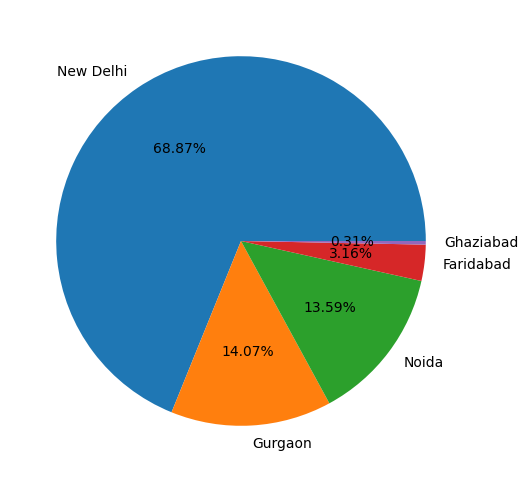

In [59]:
plt.pie(x=final_df['City'].value_counts().values[:5],labels=final_df['City'].value_counts().index[:5],autopct='%1.2f%%')

# Finding top 10 cusines items

In [60]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [63]:
final_df.Cuisines.value_counts().head(10)

Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64